First we read the data to be clustered

In [1]:
#Pickle - Python object serialization: https://docs.python.org/2/library/pickle.html
import pickle

In [2]:
data = pickle.load( open( 'data/numpy_arrays/training1.npy', "rb" ) )
data.shape

(82483, 3)

Now we visualise it

In [3]:
#Matplotlib - Python plotting: http://matplotlib.org/
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


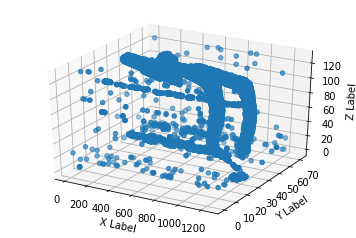

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data[:,0], ys=data[:,1], zs=data[:,2], marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

And we apply our `DBScan` method

In [5]:
#SciKitLearn - Machine Learning in Python: http://scikit-learn.org/
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [6]:
db = DBSCAN(eps=3, min_samples=20).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 13


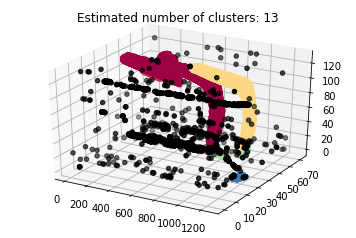

In [7]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], 'o', c=col)

    xy = data[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], 'o', c=col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()